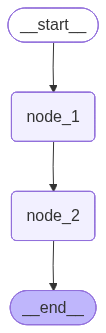

In [1]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class OverallState(TypedDict):
    foo: int

class PrivateState(TypedDict):
    baz: int

def node_1(state: OverallState) -> PrivateState:
    print("---Node 1---")
    return {"baz": state['foo'] + 1}

def node_2(state: PrivateState) -> OverallState:
    print("---Node 2---")
    return {"foo": state['baz'] + 1}

# Build graph
builder = StateGraph(OverallState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [2]:
graph.invoke({"foo" : 1})

---Node 1---
---Node 2---


{'foo': 3}

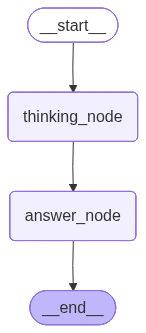

In [3]:
class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

def thinking_node(state: OverallState):
    return {"answer": "bye", "notes": "... his name is Lance"}

def answer_node(state: OverallState):
    return {"answer": "bye Lance"}

graph = StateGraph(OverallState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
graph.invoke({"question":"hi"})

{'question': 'hi', 'answer': 'bye Lance', 'notes': '... his name is Lance'}

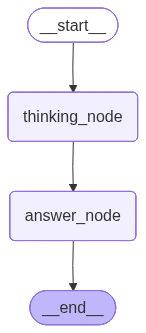

{'answer': 'bye Lance'}

In [5]:
class InputState(TypedDict):
    question: str

class OutputState(TypedDict):
    answer: str

class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

def thinking_node(state: InputState):
    return {"answer": "bye", "notes": "... his is name is Lance"}

def answer_node(state: OverallState) -> OutputState:
    return {"answer": "bye Lance"}

graph = StateGraph(OverallState, input_schema=InputState, output_schema=OutputState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"question":"hi"})



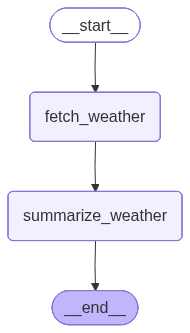

{'summary': 'The weather in Toronto is sunny with 22.5°C.'}


In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


class WeatherInput(TypedDict):
    city: str

class WeatherOutput(TypedDict):
    summary: str

class WeatherState(TypedDict):
    city: str
    temperature: float
    condition: str
    summary: str



def fetch_weather_node(state: WeatherInput) -> dict:
    """Pretend to fetch weather data for the given city."""
    city = state["city"]
    temperature = 22.5
    condition = "sunny"
    return {"city": city, "temperature": temperature, "condition": condition}


def summarize_weather_node(state: WeatherState) -> WeatherOutput:
    """Create a readable weather summary."""
    summary = f"The weather in {state['city']} is {state['condition']} with {state['temperature']}°C."
    return {"summary": summary}



graph = StateGraph(WeatherState, input_schema=WeatherInput, output_schema=WeatherOutput)

graph.add_node("fetch_weather", fetch_weather_node)
graph.add_node("summarize_weather", summarize_weather_node)

graph.add_edge(START, "fetch_weather")
graph.add_edge("fetch_weather", "summarize_weather")
graph.add_edge("summarize_weather", END)

graph = graph.compile()


display(Image(graph.get_graph().draw_mermaid_png()))


result = graph.invoke({"city": "Toronto"})
print(result)
